In [1]:
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import sklearn.metrics
import math

/Users/linwj/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df=pd.read_csv("train_day.csv", header=0)

In [3]:
data = pd.DataFrame(df, columns = ['date','store_nbr','item_nbr','onpromotion','family','class','perishable','transactions','city','state','type','cluster','transferred','dcoilwtico','yea','mon','day']).as_matrix()

In [4]:
target = pd.DataFrame(df,columns=['unit_sales']).as_matrix()

In [5]:
model =  linear_model.PassiveAggressiveRegressor()

In [6]:
#X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
kf = KFold(n_splits=5)
X=data
y=target

def NWRMSLE(y, pred, w):
    return sklearn.metrics.mean_squared_error(y_test, pred,sample_weight=w)**0.5

error=0

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    mymodel = model.fit(X_train, y_train)
    pred=mymodel.predict(X_test)
    error+=NWRMSLE(y_test,pred,X_test[:,10])
error/=5
print error

/Users/linwj/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/linwj/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.874097216383


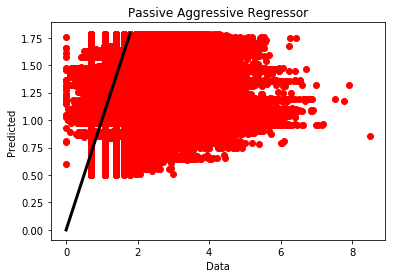

In [7]:
fig, ax = plt.subplots()
x_=y_test
y_=pred
ax.scatter(x_,y_,color='red')
ax.plot([0,y_.max()], [0,y_.max()],linewidth=3,color='black')
ax.set_xlabel('Data')
ax.set_ylabel('Predicted')
plt.title('Passive Aggressive Regressor')
plt.show()

In [8]:
extra1=0
extra2=0
sum=0

for i in range(len(x_)):
    sum+=x_[i]
avg=sum/len(x_)
print "Total units: ",sum
print "Average units: ",avg

for i in range(len(x_)):
    extra1+=abs(x_[i]-avg)
    extra2+=abs(x_[i]-y_[i])
print extra1,extra2

Total units:  [ 1231947.57088851]
Average units:  [ 1.6532969]
[ 502021.06556258] [ 533230.25696143]
